# Regresja liniowa

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import sklearn.linear_model as lm
import matplotlib.pyplot as plt

Proszę narysować wykres dowolnej funkcji na odcinku $[0,3]$.

Będzie to model, który będziemy chcieli znaleźć.

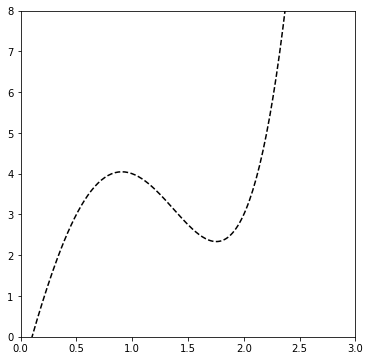

In [5]:
f = lambda x: ((x*2-1)*(x**2-2)*(x-2)+3)    # (2x-1)(x^2-2)(x-2) + 3
x_tr = np.linspace(0, 3, 200)
y_tr = f(x_tr)
plt.figure(figsize=(6,6));
axes = plt.gca()
axes.set_xlim([0,3])
axes.set_ylim([0,8])
plt.plot(x_tr[:200], y_tr[:200], '--k');
plt.show()

Proszę wylosować kilka punktów z otoczenia funkcji $f(x)$.

Na ich podstawie będziemy wykonywać naszej predykcji.

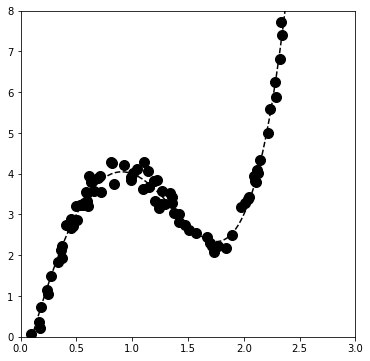

In [14]:
x = stats.uniform(0,3).rvs(100)
y = f(x) + stats.norm(0,0.2).rvs(len(x))
plt.figure(figsize=(6,6));
axes = plt.gca()
axes.set_xlim([0,3])
axes.set_ylim([0,8])
plt.plot(x_tr, y_tr, '--k');
plt.plot(x, y, 'ok', ms=10);
plt.show()

Nauczmy prosty model regresji liniowej

$$
y=a\cdot x + b
$$

na naszych danych.

Oraz narysujmy prostą regresji.
My narazie urzyjemy metody opartej na rozwiązaniu układu równań liniowych.

In [23]:
M1 = np.vstack( (np.ones_like(x), x) ).T     # macierz A? vstack łączy w jeden array, M1 = model 1
print(M1[0:5])
print(type(M1), len(M1))
p1 = np.linalg.lstsq(M1, y, rcond=None)

# lstlg zwraca rozwiązanie najmniejszych kwadratów do równania macierzy liniowej.
# Rozwiązuje równanie ax = b obliczając wektor x, który minimalizuje Euclidean 2-norm ||b - ax||^2.

print(type(p1), len(p1), p1)

[[1.         1.25511051]
 [1.         0.72227808]
 [1.         1.33702284]
 [1.         1.47699794]
 [1.         2.5436877 ]]
<class 'numpy.ndarray'> 100
<class 'tuple'> 4 (array([-0.92750984,  4.43375944]), array([1334.28232545]), 2, array([18.60574346,  4.34227949]))


Definiujemy naszą funkcję regresji

In [31]:
print('p1[0][1] = ',p1[0][1], 'p1[0][0] =',p1[0][0], 'x =',x[0:10], '...')
f_lr_1 = lambda x: p1[0][1] * x + p1[0][0]

p1[0][1] =  4.433759436646518 p1[0][0] = -0.9275098360766726 x = [1.25511051 0.72227808 1.33702284 1.47699794 2.5436877  1.89575012
 2.12769033 2.3386144  1.09778962 2.28109753] ...


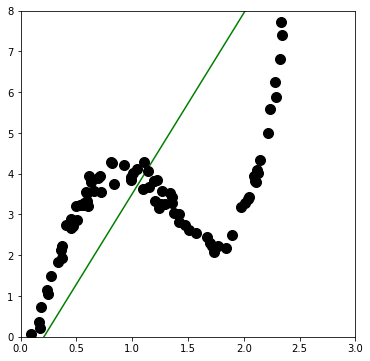

In [38]:
x_f_lr = np.linspace(0., 3, 200)
y_f_lr = f_lr_1(x_tr)
plt.figure(figsize=(6,6));
axes = plt.gca()
axes.set_xlim([0,3])
axes.set_ylim([0,8])
plt.plot(x_f_lr, y_f_lr, 'g');
plt.plot(x, y, 'ok', ms=10);
plt.show()

# Zadanie
Nauczmy prosty model regresji

$$
y=a_1\cdot x + a_2 \cdot x^2 + b
$$

na naszych danych.

Oraz narysujmy prostą regresji.

In [40]:
M2 = np.vstack( (np.ones_like(x), x, x**2) ).T
p2 = np.linalg.lstsq(M2, y, rcond=None)


print(M2[0:5])
print(type(M2), len(M2))
print(type(p2), len(p2), p2)

[[1.         1.25511051 1.57530239]
 [1.         0.72227808 0.52168562]
 [1.         1.33702284 1.78763008]
 [1.         1.47699794 2.18152292]
 [1.         2.5436877  6.47034713]]
<class 'numpy.ndarray'> 100
<class 'tuple'> 4 (array([ 5.94234636, -9.15781297,  4.65603011]), array([712.50915845]), 3, array([39.97578257,  7.21159942,  1.50084706]))


Definiujemy naszą funkcję regresji

In [41]:
f_lr_2 = lambda x: p2[0][2]*pow(x,2) + p2[0][1] * x + p2[0][0] 
print('a1 =',p2[0][2],'a2 =',p2[0][1], 'b =',p2[0][0]) 

a1 = 4.656030106257321 a2 = -9.157812965724883 b = 5.942346355287484


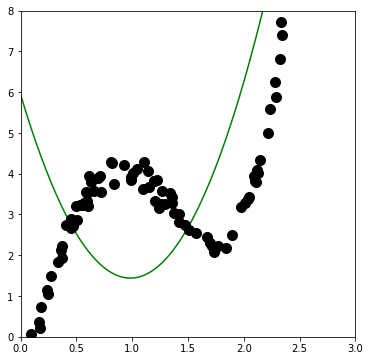

In [42]:
x_f_lr = np.linspace(0., 3, 200)
y_f_lr = f_lr_2(x_tr)
plt.figure(figsize=(6,6));
axes = plt.gca()
axes.set_xlim([0,3])
axes.set_ylim([0,8])
plt.plot(x_f_lr, y_f_lr, 'g');
plt.plot(x, y, 'ok', ms=10);
plt.show()

# Zadanie
Nauczmy prosty model regresji

$$
y=a_1\cdot x + a_2 \cdot x^2 + a_3 \cdot x ^3 + b
$$

na naszych danych.

Oraz narysujmy prostą regresji.

In [43]:
M3 = np.vstack( (np.ones_like(x), x, x**2, x**3) ).T
p3 = np.linalg.lstsq(M3, y, rcond=None)


print(M3[0:5])
print(type(M3), len(M3))
print(type(p3), len(p3), p3)

[[ 1.          1.25511051  1.57530239  1.97717859]
 [ 1.          0.72227808  0.52168562  0.37680209]
 [ 1.          1.33702284  1.78763008  2.39010226]
 [ 1.          1.47699794  2.18152292  3.22210486]
 [ 1.          2.5436877   6.47034713 16.45854244]]
<class 'numpy.ndarray'> 100
<class 'tuple'> 4 (array([ -4.34234207,  26.78630839, -25.31600119,   6.88661847]), array([34.6342417]), 4, array([94.56573847, 10.34591736,  3.26690277,  0.51179346]))


In [44]:
f_lr_3 = lambda x: p3[0][3]*pow(x,3) + p3[0][2]*pow(x,2) + p3[0][1] * x + p3[0][0] 
print('a1 =',p3[0][3],'a2 =',p3[0][2], 'a3 =',p3[0][1], 'b =',p3[0][0]) 

a1 = 6.8866184673814645 a2 = -25.316001192344523 a3 = 26.78630838561637 b = -4.34234207251529


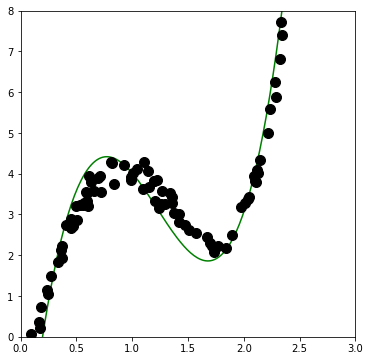

In [45]:
x_f_lr = np.linspace(0., 3, 200)
y_f_lr = f_lr_3(x_tr)
plt.figure(figsize=(6,6));
axes = plt.gca()
axes.set_xlim([0,3])
axes.set_ylim([0,8])
plt.plot(x_f_lr, y_f_lr, 'g');
plt.plot(x, y, 'ok', ms=10);
plt.show()

# Zadanie
Nauczmy prosty model regresji

$$
y=a_1\cdot x + a_2 \cdot x^2 + a_3 \cdot x ^3 + a_4 \cdot x ^4 + b
$$

na naszych danych.

Oraz narysujmy prostą regresji.

In [46]:
M4 = np.vstack( (np.ones_like(x), x, x**2, x**3, x**4) ).T
p4 = np.linalg.lstsq(M4, y, rcond=None)


print(M4[0:5])
print(type(M4), len(M4))
print(type(p4), len(p4), p4)

[[ 1.          1.25511051  1.57530239  1.97717859  2.48157763]
 [ 1.          0.72227808  0.52168562  0.37680209  0.27215589]
 [ 1.          1.33702284  1.78763008  2.39010226  3.19562131]
 [ 1.          1.47699794  2.18152292  3.22210486  4.75904224]
 [ 1.          2.5436877   6.47034713 16.45854244 41.86539202]]
<class 'numpy.ndarray'> 100
<class 'tuple'> 4 (array([-1.29218143, 11.20722551, -3.48338249, -4.29147972,  1.8857618 ]), array([3.84752532]), 5, array([2.34103615e+02, 1.61934954e+01, 5.46196958e+00, 1.29697509e+00,
       1.79225164e-01]))


In [47]:
f_lr_4 = lambda x: p4[0][4]*pow(x,4) + p4[0][3]*pow(x,3) + p4[0][2]*pow(x,2) + p4[0][1] * x + p4[0][0] 
print('a1 =',p4[0][4],'a2 =',p4[0][3], 'a3 =',p4[0][2], 'a4 =',p4[0][1], 'b =',p4[0][0]) 

a1 = 1.885761797470266 a2 = -4.2914797159659175 a3 = -3.483382487026373 a4 = 11.207225511209225 b = -1.2921814285143787


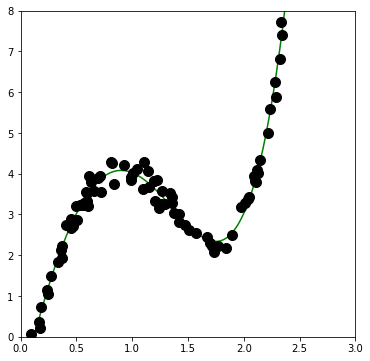

In [48]:
x_f_lr = np.linspace(0., 3, 200)
y_f_lr = f_lr_4(x_tr)
plt.figure(figsize=(6,6));
axes = plt.gca()
axes.set_xlim([0,3])
axes.set_ylim([0,8])
plt.plot(x_f_lr, y_f_lr, 'g');
plt.plot(x, y, 'ok', ms=10);
plt.show()

# Zadanie
Nauczmy prosty model regresji

$$
y=a_1\cdot x + a_2 \cdot x^2 + a_3 \cdot x ^3 + a_4 \cdot x ^4 + a_5 \cdot x^5 + b
$$

na naszych danych.

Oraz narysujmy prostą regresji.

In [49]:
M5 = np.vstack( (np.ones_like(x), x, x**2, x**3, x**4, x**5) ).T
p5 = np.linalg.lstsq(M5, y, rcond=None)


print(M5[0:5])
print(type(M5), len(M5))
print(type(p5), len(p5), p5)

[[  1.           1.25511051   1.57530239   1.97717859   2.48157763
    3.11465417]
 [  1.           0.72227808   0.52168562   0.37680209   0.27215589
    0.19657223]
 [  1.           1.33702284   1.78763008   2.39010226   3.19562131
    4.27261869]
 [  1.           1.47699794   2.18152292   3.22210486   4.75904224
    7.02909558]
 [  1.           2.5436877    6.47034713  16.45854244  41.86539202
  106.49248287]]
<class 'numpy.ndarray'> 100
<class 'tuple'> 4 (array([-1.15412048, 10.21784339, -1.37723002, -6.11741849,  2.57044533,
       -0.09239078]), array([3.80622993]), 6, array([5.95024083e+02, 3.03069520e+01, 7.83617302e+00, 2.50970823e+00,
       4.72911374e-01, 6.31199956e-02]))


In [50]:
f_lr_5 = lambda x: p5[0][5]*pow(x,5) + p5[0][4]*pow(x,4) + p5[0][3]*pow(x,3) + p5[0][2]*pow(x,2) + p5[0][1] * x + p5[0][0] 
print('a1 =',p5[0][5],'a2 =',p5[0][4], 'a3 =',p5[0][3], 'a4 =',p5[0][2], 'a5 =',p5[0][1], 'b =',p5[0][0]) 

a1 = -0.09239077835425635 a2 = 2.5704453281529243 a3 = -6.1174184933157045 a4 = -1.3772300170688656 a5 = 10.217843386792325 b = -1.1541204757029961


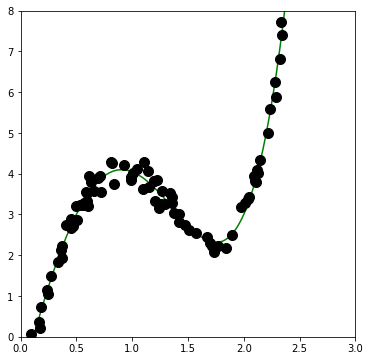

In [51]:
x_f_lr = np.linspace(0., 3, 200)
y_f_lr = f_lr_5(x_tr)
plt.figure(figsize=(6,6));
axes = plt.gca()
axes.set_xlim([0,3])
axes.set_ylim([0,8])
plt.plot(x_f_lr, y_f_lr, 'g');
plt.plot(x, y, 'ok', ms=10);
plt.show()

# Zadanie
Narysuj wszystkie wyniki na jednym wykresie.

## Która z krzywych jest najlepsza?

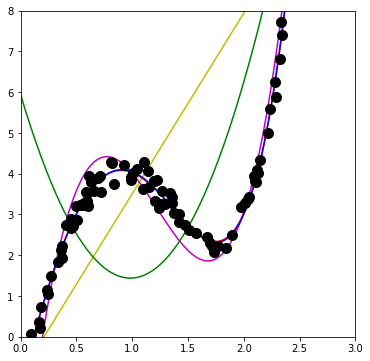

In [52]:
x_f_lr = np.linspace(0., 3, 200)

y1_f_lr = f_lr_1(x_tr)
y2_f_lr = f_lr_2(x_tr)
y3_f_lr = f_lr_3(x_tr)
y4_f_lr = f_lr_4(x_tr)
y5_f_lr = f_lr_5(x_tr)

plt.figure(figsize=(6,6));
axes = plt.gca()
axes.set_xlim([0,3])
axes.set_ylim([0,8])

plt.plot(x_f_lr, y1_f_lr, 'y');
plt.plot(x_f_lr, y2_f_lr, 'g');
plt.plot(x_f_lr, y3_f_lr, 'm');
plt.plot(x_f_lr, y4_f_lr, 'r');
plt.plot(x_f_lr, y5_f_lr, 'b');

plt.plot(x, y, 'ok', ms=10);
plt.show()

# Zadanie
Musimy mieć jakąś miarę oceny.

In [55]:
# Regresja liniowa czasem nazywana jest OLS = Ordinary Least Squares, bo chcemy zminimalizować sumę kwadratów reszt(residuów)

import statsmodels.api as sm
Res1 = sm.OLS(y, M1).fit()
Res2 = sm.OLS(y, M2).fit()
Res3 = sm.OLS(y, M3).fit()
Res4 = sm.OLS(y, M4).fit()
Res5 = sm.OLS(y, M5).fit()

In [59]:
print('>>>>>>>>>>>>>>>>>> Podsumowanie modelu M1 <<<<<<<<<<<<<<<<<')
print(Res1.summary2())

>>>>>>>>>>>>>>>>>> Podsumowanie modelu M1 <<<<<<<<<<<<<<<<<
                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.485   
Dependent Variable: y                AIC:                546.8856
Date:               2019-02-12 23:20 BIC:                552.0959
No. Observations:   100              Log-Likelihood:     -271.44 
Df Model:           1                F-statistic:        94.24   
Df Residuals:       98               Prob (F-statistic): 5.21e-16
R-squared:          0.490            Scale:              13.615  
-------------------------------------------------------------------
            Coef.    Std.Err.      t      P>|t|     [0.025   0.975]
-------------------------------------------------------------------
const      -0.9275     0.7435   -1.2475   0.2152   -2.4030   0.5480
x1          4.4338     0.4567    9.7079   0.0000    3.5274   5.3401
-----------------------------------------------------------------
Omnibus:             63

In [60]:
print('>>>>>>>>>>>>>>>>>> Podsumowanie modelu M2 <<<<<<<<<<<<<<<<<')
print(Res2.summary2())

>>>>>>>>>>>>>>>>>> Podsumowanie modelu M2 <<<<<<<<<<<<<<<<<
                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.722   
Dependent Variable: y                AIC:                486.1500
Date:               2019-02-12 23:20 BIC:                493.9655
No. Observations:   100              Log-Likelihood:     -240.07 
Df Model:           2                F-statistic:        129.7   
Df Residuals:       97               Prob (F-statistic): 3.92e-28
R-squared:          0.728            Scale:              7.3455  
-------------------------------------------------------------------
          Coef.    Std.Err.      t      P>|t|     [0.025     0.975]
-------------------------------------------------------------------
const     5.9423     0.9251    6.4235   0.0000     4.1063    7.7784
x1       -9.1578     1.5149   -6.0452   0.0000   -12.1645   -6.1512
x2        4.6560     0.5061    9.2004   0.0000     3.6516    5.6604
---------------------

In [61]:
print('>>>>>>>>>>>>>>>>>> Podsumowanie modelu M3 <<<<<<<<<<<<<<<<<')
print(Res3.summary2())

>>>>>>>>>>>>>>>>>> Podsumowanie modelu M3 <<<<<<<<<<<<<<<<<
                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.986   
Dependent Variable: y                AIC:                185.7550
Date:               2019-02-12 23:20 BIC:                196.1757
No. Observations:   100              Log-Likelihood:     -88.877 
Df Model:           3                F-statistic:        2386.   
Df Residuals:       96               Prob (F-statistic): 5.39e-90
R-squared:          0.987            Scale:              0.36077 
------------------------------------------------------------------
           Coef.    Std.Err.     t      P>|t|    [0.025    0.975] 
------------------------------------------------------------------
const      -4.3423    0.3136  -13.8480  0.0000   -4.9648   -3.7199
x1         26.7863    0.8946   29.9420  0.0000   25.0105   28.5621
x2        -25.3160    0.7005  -36.1408  0.0000  -26.7064  -23.9256
x3          6.8866    0.158

In [62]:
print('>>>>>>>>>>>>>>>>>> Podsumowanie modelu M4 <<<<<<<<<<<<<<<<<')
print(Res4.summary2())

>>>>>>>>>>>>>>>>>> Podsumowanie modelu M4 <<<<<<<<<<<<<<<<<
                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.998    
Dependent Variable: y                AIC:                -31.9863 
Date:               2019-02-12 23:20 BIC:                -18.9604 
No. Observations:   100              Log-Likelihood:     20.993   
Df Model:           4                F-statistic:        1.613e+04
Df Residuals:       95               Prob (F-statistic): 1.36e-133
R-squared:          0.999            Scale:              0.040500 
--------------------------------------------------------------------
           Coef.    Std.Err.      t       P>|t|     [0.025    0.975]
--------------------------------------------------------------------
const     -1.2922     0.1526    -8.4695   0.0000   -1.5951   -0.9893
x1        11.2072     0.6396    17.5214   0.0000    9.9374   12.4771
x2        -3.4834     0.8259    -4.2176   0.0001   -5.1230   -1.8437
x3      

In [63]:
print('>>>>>>>>>>>>>>>>>> Podsumowanie modelu M5 <<<<<<<<<<<<<<<<<')
print(Res5.summary2())

>>>>>>>>>>>>>>>>>> Podsumowanie modelu M5 <<<<<<<<<<<<<<<<<
                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.998    
Dependent Variable: y                AIC:                -31.0654 
Date:               2019-02-12 23:20 BIC:                -15.4344 
No. Observations:   100              Log-Likelihood:     21.533   
Df Model:           5                F-statistic:        1.291e+04
Df Residuals:       94               Prob (F-statistic): 1.11e-131
R-squared:          0.999            Scale:              0.040492 
--------------------------------------------------------------------
            Coef.    Std.Err.      t      P>|t|     [0.025    0.975]
--------------------------------------------------------------------
const      -1.1541     0.2048   -5.6341   0.0000   -1.5608   -0.7474
x1         10.2178     1.1700    8.7333   0.0000    7.8948   12.5409
x2         -1.3772     2.2431   -0.6140   0.5407   -5.8310    3.0765
x3      

<b>WNIOSEK:
Najlepsze modele to M4 oraz M5 bo R2 najbliżej 1, Adj. R2 najbliżej 1, AIC, BIC możliwie jak najmniejsze </b>


# Zadanie
Analogiczne wyniki możemy uzyskać za pomocą prostego kodu.

In [66]:
import statsmodels.formula.api as smf
# Turn the data into a pandas DataFrame, so that we
# can address them in the formulas with their name
df = pd.DataFrame({'x':x, 'y':y})

# Fit the models, and show the results
Res1F = smf.ols('y~x', df).fit()
Res2F = smf.ols('y ~ x+I(x**2)', df).fit()
Res3F = smf.ols('y ~ x+I(x**2)+I(x**3)', df).fit()
Res4F = smf.ols('y ~ x+I(x**2)+I(x**3)+I(x**4)', df).fit()
Res5F = smf.ols('y ~ x+I(x**2)+I(x**3)+I(x**4)+I(x**5)', df).fit()

In [67]:
print(Res1F.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.490
Model:                            OLS   Adj. R-squared:                  0.485
Method:                 Least Squares   F-statistic:                     94.24
Date:                Tue, 12 Feb 2019   Prob (F-statistic):           5.21e-16
Time:                        23:58:52   Log-Likelihood:                -271.44
No. Observations:                 100   AIC:                             546.9
Df Residuals:                      98   BIC:                             552.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.9275      0.744     -1.247      0.2

In [68]:
print(Res2F.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.728
Model:                            OLS   Adj. R-squared:                  0.722
Method:                 Least Squares   F-statistic:                     129.7
Date:                Tue, 12 Feb 2019   Prob (F-statistic):           3.92e-28
Time:                        23:59:03   Log-Likelihood:                -240.07
No. Observations:                 100   AIC:                             486.1
Df Residuals:                      97   BIC:                             494.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.9423      0.925      6.424      0.0

In [69]:
print(Res3F.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                     2386.
Date:                Tue, 12 Feb 2019   Prob (F-statistic):           5.39e-90
Time:                        23:59:10   Log-Likelihood:                -88.877
No. Observations:                 100   AIC:                             185.8
Df Residuals:                      96   BIC:                             196.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -4.3423      0.314    -13.848      0.0

In [70]:
print(Res4F.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 1.613e+04
Date:                Tue, 12 Feb 2019   Prob (F-statistic):          1.36e-133
Time:                        23:59:31   Log-Likelihood:                 20.993
No. Observations:                 100   AIC:                            -31.99
Df Residuals:                      95   BIC:                            -18.96
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.2922      0.153     -8.470      0.0

In [71]:
print(Res5F.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 1.291e+04
Date:                Tue, 12 Feb 2019   Prob (F-statistic):          1.11e-131
Time:                        23:59:43   Log-Likelihood:                 21.533
No. Observations:                 100   AIC:                            -31.07
Df Residuals:                      94   BIC:                            -15.43
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.1541      0.205     -5.634      0.0